<a href="https://colab.research.google.com/github/AlmazGaripov/DIPLOM_Cov19/blob/main/%5CTo%20check%5CGaripov_Cov19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
 # Подгрузим пакеты 
import requests
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import plotly.graph_objects as go
import plotly.express as px
import requests
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime


# Подготовка и преобразование данных 

In [322]:
confirmed = pd.read_csv('https://query.data.world/s/ykfg2xuif4xkbgc753yvv3pzk7ocgj?dws=00000')  # Откроем датасет с подтвержденными случаями заболеваний
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [323]:
deaths = pd.read_csv('https://query.data.world/s/gyawc42jo5ulywxuifksni6cyy7k2s?dws=00000')  # Откроем датасет с количеством смертей
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [324]:
#определим количество строк и столбцов в датасетах
conf_rows = len(confirmed.axes[0])
conf_cols = len(confirmed.axes[1])
print('Количество строк в confirmed:', conf_rows)
print('Количество столбцов в confirmed:', conf_cols)

deaths_rows = len(deaths.axes[0])
deaths_cols = len(deaths.axes[1])
print('Количество строк в deaths:', deaths_rows)
print('Количество столбцов в deaths:', deaths_cols)


Количество строк в confirmed: 289
Количество столбцов в confirmed: 1147
Количество строк в deaths: 289
Количество столбцов в deaths: 1147


In [325]:
#проверим типы данных в столбцах
confirmed.dtypes


Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

In [326]:
#проверим типы данных в столбцах
deaths.dtypes


Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

In [327]:
#транспонируем столбцы с датами в строки
new_confirmed = confirmed.melt(id_vars = ['Province/State',	'Country/Region',	'Lat',	'Long'], var_name = 'Date', value_name = 'Confirmed')
new_confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [328]:
#сделаем тоже самое с вторым датафреймом
new_deaths = deaths.melt(id_vars = ['Province/State',	'Country/Region',	'Lat',	'Long'], var_name = 'Date', value_name = 'Deaths')
new_deaths.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [329]:
#посмотрим на количество строк в новых датафреймах после транспонирования
print(len(new_confirmed.axes[0]))
print(len(new_deaths.axes[0]))

330327
330327


In [330]:
#объединим датафреймы по всем признакам
cov_merged = pd.merge(new_confirmed, new_deaths,  how='inner', on=['Province/State','Country/Region','Date', 'Lat', 'Long'])
cov_merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0


In [331]:
#убедимся что мы не потеряли данные при "внутреннем" слиянии
print(len(cov_merged.axes[0]))

330327


In [332]:
#добавим в датафрейм столбец с континентом, чтобы можно была возможность сделать верхнеуровневый анализ
# Подгрузим справочник со страной/континентом
continents = pd.read_excel('https://github.com/AlmazGaripov/DIPLOM_Cov19/blob/main/mydata.xlsx?raw=true')  
continents.head()

,Country/Region,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [333]:
#соединяем датафреймы
cov_merged = pd.merge(cov_merged, continents,  how='inner', on=['Country/Region'])
cov_merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Continent
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,Asia
1,NaN,Afghanistan,33.93911,67.709953,1/23/20,0,0,Asia
2,NaN,Afghanistan,33.93911,67.709953,1/24/20,0,0,Asia
3,NaN,Afghanistan,33.93911,67.709953,1/25/20,0,0,Asia
4,NaN,Afghanistan,33.93911,67.709953,1/26/20,0,0,Asia


In [334]:
#убедимся что мы не потеряли данные при "внутреннем" слиянии
print(len(cov_merged.axes[0]))

330327


In [335]:
cont_check = cov_merged[['Country/Region', 'Continent']].drop_duplicates()
cont_check = cont_check[(cont_check['Continent'] == 'Not Continent')]
cont_check

,Country/Region,Continent
121158,Diamond Princess,Not Continent
200025,MS Zaandam,Not Continent
278892,Summer Olympics 2020,Not Continent
325755,Winter Olympics 2022,Not Continent


In [336]:
#в исходном датафрейме есть статистика по завершившимся событиям: Олимпийские игры 2020/2022, лайнеры Diamond Princess и MS Zaandam, удалим их, т.к. данные события завершены и нет смысла включать их в данные для модели
cov_merged = cov_merged[(cov_merged['Continent'] != 'Not Continent')]

In [337]:
#поменяем столбцы местами для более комфортной работы, проранжировав географическую принадлежность от самой укрупненной (континент) до более детализированной (координаты)
cov_merged = cov_merged[['Date', 'Continent', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed', 'Deaths']]
cov_merged.head()

,Date,Continent,Country/Region,Province/State,Lat,Long,Confirmed,Deaths
0,1/22/20,Asia,Afghanistan,NaN,33.93911,67.709953,0,0
1,1/23/20,Asia,Afghanistan,NaN,33.93911,67.709953,0,0
2,1/24/20,Asia,Afghanistan,NaN,33.93911,67.709953,0,0
3,1/25/20,Asia,Afghanistan,NaN,33.93911,67.709953,0,0
4,1/26/20,Asia,Afghanistan,NaN,33.93911,67.709953,0,0


In [338]:
#типы данных получившегося датафрейма
cov_merged.dtypes

Date               object
Continent          object
Country/Region     object
Province/State     object
Lat               float64
Long              float64
Confirmed           int64
Deaths              int64
dtype: object

In [339]:
#изменим формат дат с object на datetime64[ns]
cov_merged['Date'] = pd.to_datetime(cov_merged['Date'])

In [340]:
#проверим изменения
cov_merged.dtypes

Date              datetime64[ns]
Continent                 object
Country/Region            object
Province/State            object
Lat                      float64
Long                     float64
Confirmed                  int64
Deaths                     int64
dtype: object

In [341]:
cov_merged.describe()

,Lat,Long,Confirmed,Deaths
count,323469.000000,323469.000000,3.257550e+05,3.257550e+05
mean,19.730456,21.590378,9.728439e+05,1.356787e+04
std,25.996255,77.743943,4.898726e+06,6.431890e+04
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00
25%,4.210484,-51.925300,7.510000e+02,4.000000e+00
50%,21.512583,20.939400,1.538500e+04,1.610000e+02
75%,41.112900,88.092400,2.357810e+05,3.138000e+03
max,71.706900,178.065000,1.038027e+08,1.123836e+06


In [342]:
# помимо статистик приведенных в методе describe посчитаем следующией статистики:
# для категориальных признаков: 
# уникальные значения:
print('Уникальные значения:')
print('Date:', (cov_merged['Date'].nunique()))
print('Continent:', (cov_merged['Continent'].nunique()))
print('Country/Region:', (cov_merged['Country/Region'].nunique()))
print('Province/State:', (cov_merged['Province/State'].nunique()))
print('Lat:', (cov_merged['Lat'].nunique()))
print('Long:', (cov_merged['Long'].nunique()))


Уникальные значения:
Date: 1143
Continent: 7
Country/Region: 197
Province/State: 91
Lat: 281
Long: 282


In [343]:
# для количественных признаков посчитаем межквартильный размах:

q1_conf = cov_merged['Confirmed'].quantile(0.25)
q3_conf = cov_merged['Confirmed'].quantile(0.75)
iqr_conf = q3_conf - q1_conf

q1_death = cov_merged['Deaths'].quantile(0.25)
q3_death = cov_merged['Deaths'].quantile(0.75)
iqr_death = q3_death - q1_death

print('Confirmed', iqr_conf)
print('Deaths:', iqr_death)

Confirmed 235030.0
Deaths: 3134.0


In [344]:
#Количество незаполненных значений в столбцах
cov_merged.isna().sum()

Date                   0
Continent              0
Country/Region         0
Province/State    221742
Lat                 2286
Long                2286
Confirmed              0
Deaths                 0
dtype: int64

In [345]:
# Процент незаполненных значений в столбцах
round((cov_merged.isnull().sum()*100)/len(cov_merged),2)


Date               0.00
Continent          0.00
Country/Region     0.00
Province/State    68.07
Lat                0.70
Long               0.70
Confirmed          0.00
Deaths             0.00
dtype: float64

In [346]:
combinations = cov_merged[['Country/Region', 'Province/State']]
combinations.drop_duplicates()

,Country/Region,Province/State
0,Afghanistan,NaN
1143,Albania,NaN
2286,Algeria,NaN
3429,Andorra,NaN
4572,Angola,NaN
...,...,...
323469,Vietnam,NaN
324612,West Bank and Gaza,NaN
326898,Yemen,NaN
328041,Zambia,NaN


In [347]:
#Видим, что "Province/State" в основном не заполнен у небольших стран, где нет деления на провинции/штаты
#Поэтому пустые значения заменим на название страны
cov_merged['Province/State'] = cov_merged['Province/State'].fillna(cov_merged['Country/Region'])

In [348]:
#проверим
cov_merged.isna().sum()

Date                 0
Continent            0
Country/Region       0
Province/State       0
Lat               2286
Long              2286
Confirmed            0
Deaths               0
dtype: int64

In [349]:
#найдем закономерность в незаполненных координатах
coordinates = cov_merged[cov_merged.Lat.isnull()]
coordinates = coordinates[['Country/Region', 'Province/State']]
coordinates.drop_duplicates()

,Country/Region,Province/State
45733,Canada,Repatriated Travellers
67467,China,Unknown


In [350]:
#видим что координаты не заполнены у путешественников-репатриантов в Канаде и в неизвестной провинции китая
#Заменим пустые значения в координатах на самые частовстречаемые координаты в данных странах:
cov_merged['Lat'].fillna(cov_merged.groupby(['Country/Region'])['Lat'].transform(lambda x: x.mode()[0]), inplace=True)
cov_merged['Long'].fillna(cov_merged.groupby(['Country/Region'])['Long'].transform(lambda x: x.mode()[0]), inplace=True)

In [351]:
#Убедимся, что в датасете не осталось незаполненных значений
cov_merged.isna().sum()

Date              0
Continent         0
Country/Region    0
Province/State    0
Lat               0
Long              0
Confirmed         0
Deaths            0
dtype: int64

# Анализ данных для стейкхолдеров

In [352]:
# сгруппируем данные по дням, суммируя случаи заражения и визуализируем при помощи plotly динамику
cov_merged_dates = cov_merged.groupby('Date').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x = cov_merged_dates.index, y = cov_merged_dates['Confirmed']))
fig.update_layout(title = 'Динамика зараженных COVID-19')
fig.show()

In [381]:
# динамика по погибшим
fig = go.Figure()
fig.add_trace(go.Scatter(x = cov_merged_dates.index, y = cov_merged_dates['Deaths'], line_color = 'red'))
fig.update_layout(title = 'Динамика смертности от COVID-19')

In [354]:
#рассчитаем соотношение Погибших к зараженным
cov_merged_dates['Death_Rate'] = round(cov_merged_dates['Deaths']/cov_merged_dates['Confirmed']*100, 2)
# Визуализируем
fig = go.Figure()
fig.add_trace(go.Scatter(x = cov_merged_dates.index, y = cov_merged_dates['Death_Rate'], line_color = 'red'))
fig.update_layout(title = 'Динамика по соотношению погибших к заболевшим COVID-19')

In [355]:
Africa = cov_merged[(cov_merged['Continent'] == 'Africa')]
Africa = Africa.groupby('Date').sum()
Antarctica = cov_merged[(cov_merged['Continent'] == 'Antarctica')]
Antarctica = Antarctica.groupby('Date').sum()
Asia = cov_merged[(cov_merged['Continent'] == 'Asia')]
Asia = Asia.groupby('Date').sum()
Europe = cov_merged[(cov_merged['Continent'] == 'Europe')]
Europe = Europe.groupby('Date').sum()
NA = cov_merged[(cov_merged['Continent'] == 'North America')]
NA = NA.groupby('Date').sum()
Oceania = cov_merged[(cov_merged['Continent'] == 'Oceania')]
Oceania = Oceania.groupby('Date').sum()
SA = cov_merged[(cov_merged['Continent'] == 'South America')]
SA = SA.groupby('Date').sum()

In [356]:
#Визуализируем динамику заболеваемости в разрезе Континентов
fig = go.Figure()
fig.add_trace(go.Scatter(x = Africa.index, y = Africa['Confirmed'], name = 'Africa'))
fig.add_trace(go.Scatter(x = Antarctica.index, y = Antarctica['Confirmed'], name = 'Antarctica'))
fig.add_trace(go.Scatter(x = Asia.index, y = Asia['Confirmed'], name = 'Asia'))
fig.add_trace(go.Scatter(x = Europe.index, y = Europe['Confirmed'], name = 'Europe'))
fig.add_trace(go.Scatter(x = NA.index, y = NA['Confirmed'], name = 'North America'))
fig.add_trace(go.Scatter(x = Oceania.index, y = Oceania['Confirmed'], name = 'Oceania'))
fig.add_trace(go.Scatter(x = SA.index, y = SA['Confirmed'], name = 'South America'))

fig.update_layout(title = 'Динамика зараженных COVID-19 в разрезе континентов')
fig.show()

In [357]:
#Визуализируем динамику заболеваемости в разрезе Континентов
fig = go.Figure()
fig.add_trace(go.Scatter(x = Africa.index, y = Africa['Deaths'], name = 'Africa'))
fig.add_trace(go.Scatter(x = Antarctica.index, y = Antarctica['Deaths'], name = 'Antarctica'))
fig.add_trace(go.Scatter(x = Asia.index, y = Asia['Deaths'], name = 'Asia'))
fig.add_trace(go.Scatter(x = Europe.index, y = Europe['Deaths'], name = 'Europe'))
fig.add_trace(go.Scatter(x = NA.index, y = NA['Deaths'], name = 'North America'))
fig.add_trace(go.Scatter(x = Oceania.index, y = Oceania['Deaths'], name = 'Oceania'))
fig.add_trace(go.Scatter(x = SA.index, y = SA['Deaths'], name = 'South America'))

fig.update_layout(title = 'Динамика смертей от COVID-19 в разрезе континентов')
fig.show()

In [358]:
#определим Топ-20 стран по количеству случаев заражения на последнюю отчетную дату
last_period = cov_merged.loc[cov_merged['Date'] == '3/9/23'] 
last_period = last_period.groupby('Country/Region')['Confirmed','Deaths'].sum().reset_index()
top_20_conf = last_period.sort_values(by=['Confirmed'], ascending=False).head(20)
top_20_conf

<ipython-input-358-b6277960c776>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Deaths
183,US,103802702,1123836
79,India,44690738,530779
62,France,39866718,166176
66,Germany,38249060,168935
24,Brazil,37076053,699276
87,Japan,33320438,72997
93,"Korea, South",30615522,34093
85,Italy,25603510,188322
187,United Kingdom,24658705,220721
145,Russia,22075858,388478


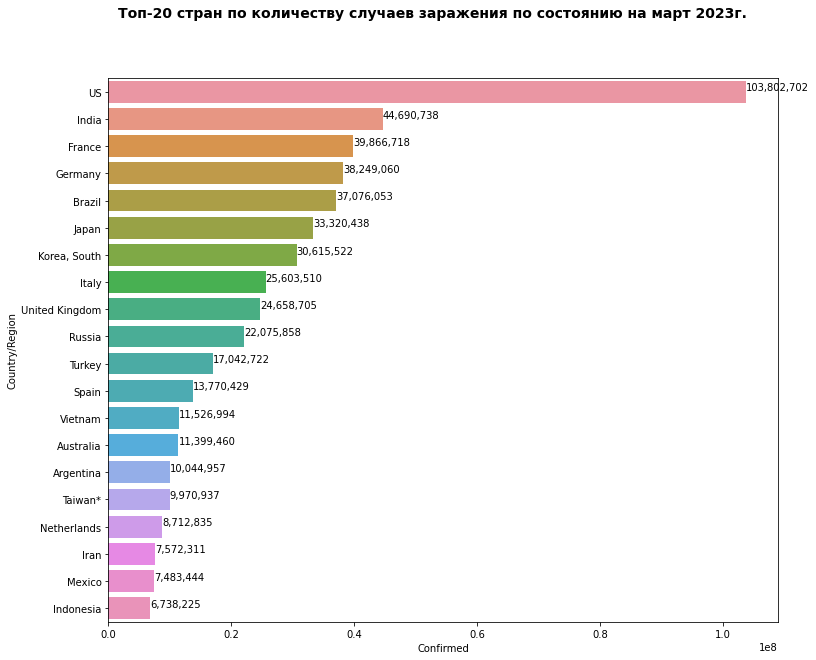

In [359]:
#Визуализируем с помощью диаграммы bar plot 
plt.figure(figsize=(12,10))
plt.suptitle('Топ-20 стран по количеству случаев заражения по состоянию на март 2023г.', fontsize=14, fontweight='bold')
plot = sns.barplot(x = top_20_conf['Confirmed'], y= top_20_conf['Country/Region'])
for i,(value,name) in enumerate(zip(top_20_conf['Confirmed'],top_20_conf['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [360]:
#Найдем топ 20 стран по количествую погибших
top_20_deaths = last_period.sort_values(by=['Deaths'], ascending=False).head(20)
top_20_deaths

,Country/Region,Confirmed,Deaths
183,US,103802702,1123836
24,Brazil,37076053,699276
79,India,44690738,530779
145,Russia,22075858,388478
115,Mexico,7483444,333188
187,United Kingdom,24658705,220721
139,Peru,4487553,219539
85,Italy,25603510,188322
66,Germany,38249060,168935
62,France,39866718,166176


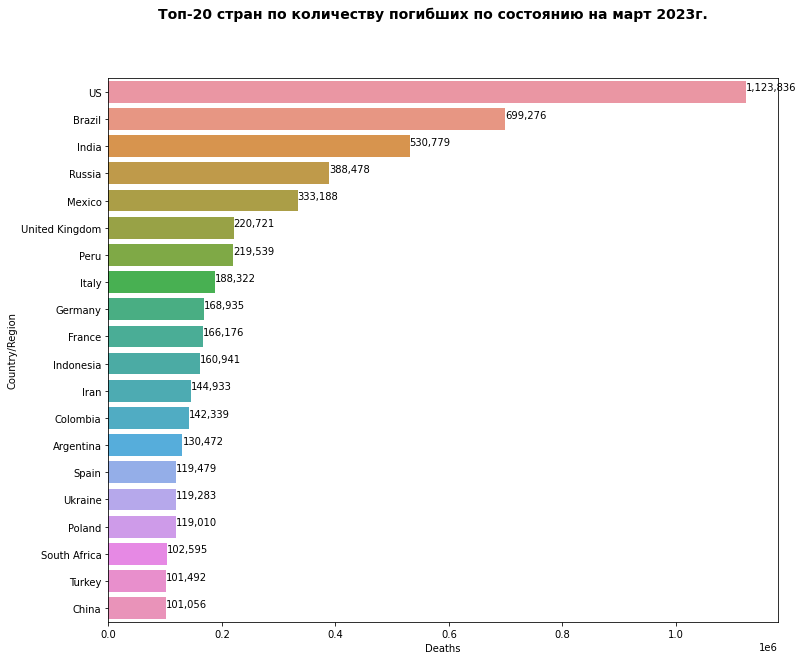

In [361]:
#Визуализируем с помощью диаграммы bar plot
top_20_deaths = last_period.sort_values(by=['Deaths'], ascending=False).head(20)

plt.figure(figsize=(12,10))
plt.suptitle('Топ-20 стран по количеству погибших по состоянию на март 2023г.', fontsize=14, fontweight='bold')
plot = sns.barplot(x = top_20_deaths['Deaths'], y= top_20_deaths['Country/Region'])
for i,(value,name) in enumerate(zip(top_20_deaths['Deaths'],top_20_deaths['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [362]:
figure = px.choropleth(last_period,locations='Country/Region', locationmode='country names', color='Confirmed', hover_name='Country/Region', color_continuous_scale= 'tealgrn', range_color=[1,10000000],title='Случаи заражения COVID-19 на мировой карте по состоянию на март 2023г.')
figure.show()

In [363]:
figure = px.choropleth(last_period,locations='Country/Region', locationmode='country names', color='Deaths', hover_name='Country/Region', color_continuous_scale= 'tealgrn', range_color=[1,500000],title='Погибшие от COVID-19 на мировой карте по состоянию на март 2023г.')
figure.show()

# **Построение модели Линейной Регрессии**

In [364]:
# С помощью модели линейной регрессии попробуем предсказать кол-во случаев заражений в течение следующего года (365 дней) после последней отчетной даты (09.03.2023)
# Подготовим данные для прогнозирования.
# Даты преобразуем в индексы, таким образом первый день в датасете будет 0, а каждый последующий будет увеличиваться на 1

In [365]:
conf_per_day = cov_merged.groupby(
    ["Date"])['Confirmed'].sum().reset_index()
conf_per_day = conf_per_day.sort_values(
    'Date', ascending=True)
conf_per_day.head()

,Date,Confirmed
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120


In [366]:
index_df = pd.DataFrame(conf_per_day.index)
confirmed_df = pd.DataFrame(conf_per_day.Confirmed)

In [367]:
index_df.head()

,0
0,0
1,1
2,2
3,3
4,4


In [368]:
confirmed_df.head()

,Confirmed
0,557
1,657
2,944
3,1437
4,2120


In [369]:
X = index_df
y = confirmed_df

In [370]:
#Разделим данные следующим образом: тестовая выборка 20%, тренировочная выборка 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [371]:
#Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

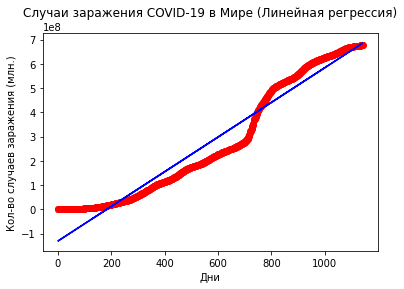

In [372]:
#Посмотрим на графике как наша модель ведет себя по отношению к реальным тренировочным данным
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Случаи заражения COVID-19 в Мире (Линейная регрессия)')
plt.xlabel('Дни')
plt.ylabel('Кол-во случаев заражения (млн.)')
plt.show()

In [373]:
#Проверим точность нашей модели с помощью показателей R^2 (коэффициент детерминации) и RMSE (среднее отклонение прогнозов от наблюдений) на тренировочных данных
print('R^2: ',
      r2_score(y_train, model.predict(X_train)))
rmse = np.sqrt(mean_squared_error(
    y_train, model.predict(X_train)))
print('RMSE:', rmse)

R^2:  0.9506503579772974
RMSE: 53708504.821213044


In [374]:
#Наблюдаем высокое значение показателя коэффициента детерминации = ~0,95, что может говорить о том, что получвшаяся модель хорошая, 
#Но в то же, высокое значение показателя RMSE, говорит о том, что у модели высокое среднее отклонение прогнозов от наблюдений, но как мы знаем, RMSE - чувствителен к аномалиям, также могу предположить, что эта разница по большей части обусловлена периодом в первые 200 дней, когда модель выдает отрицательные значения

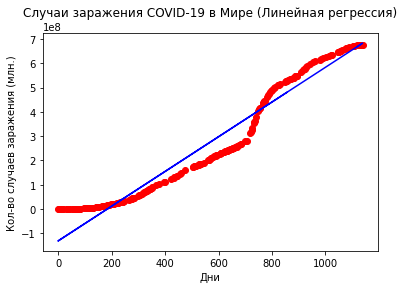

In [375]:
#Построим графики на тестовых данных
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, model.predict(X_test), color='blue')
plt.title('Случаи заражения COVID-19 в Мире (Линейная регрессия)')
plt.xlabel('Дни')
plt.ylabel('Кол-во случаев заражения (млн.)')
plt.show()

In [376]:
#Проверим R^2 и RMSE на тестовых данных
print('Linear Regession  R2 Score   : ',
      r2_score(y_test, model.predict(X_test)))
rmse = np.sqrt(mean_squared_error(
    y_test, model.predict(X_test)))
print('RMSE of Linear regression is :', rmse)

Linear Regession  R2 Score   :  0.9353607616216502
RMSE of Linear regression is : 58352487.25956876


In [377]:
#Видим аналогичные показатели, как и на тренировочных данных

In [403]:
#Теперь предскажем данные по заболеваемости на ближайший год (365 дней)
#Создаем диапазон индексов дат: Последняя в датасете (1142) + 365 дней и преобразуем в датафрейм:
ind_days_to_predict = pd.DataFrame(np.array(list(range(1143, 1143+365))))
#Предсказываем кол-во зараженных:
confirmed_365_pred = model.predict(ind_days_to_predict)

predicted_result_365 = pd.DataFrame(confirmed_365_pred)
predicted_result_365['Predicted Confirmed'] = pd.DataFrame(confirmed_365_pred)
predicted_result_365['Days'] = pd.DataFrame(np.array(list(range(1143, 1143+365))))
predicted_result_365 = predicted_result_365[['Days','Predicted Confirmed']]
predicted_result_365.head()


,Days,Predicted Confirmed
0,1143,6.857143e+08
1,1144,6.864289e+08
2,1145,6.871434e+08
3,1146,6.878580e+08
4,1147,6.885725e+08


In [404]:
#Аналогичным способом поменяем индексы дней к Датам:
datelist = pd.date_range('2023-03-10', periods=365).tolist()
predicted_result_365['Date'] = pd.DataFrame(datelist)
predicted_result_365 = predicted_result_365[['Date','Predicted Confirmed']]
predicted_result_365.head()

,Date,Predicted Confirmed
0,2023-03-10,6.857143e+08
1,2023-03-11,6.864289e+08
2,2023-03-12,6.871434e+08
3,2023-03-13,6.878580e+08
4,2023-03-14,6.885725e+08


In [414]:
#Визуализируем график с Динамикой зараженных: официальные данные + предсказанные
fig = go.Figure()
fig.add_trace(go.Scatter(x = conf_per_day['Date'], y = conf_per_day['Confirmed'], name = 'Официальные данные'))
fig.add_trace(go.Scatter(x = predicted_result_365['Date'], y = predicted_result_365['Predicted Confirmed'], name = 'Прогнозируемые данные'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Динамика зараженных с прогнозом на год",
                  xaxis_title="Период",
                  yaxis_title="Кол-во подтвержденных случаев",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()